In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


**Loan Default Prediction**

Jing Xu, DSI, 10/23/24

GitHub: https://github.com/Jing-Xu1223/DATA1030-Project

Kaggle: https://www.kaggle.com/datasets/nikhil1e9/loan-default

Sources: https://www.coursera.org/projects/data-science-coding-challenge-loan-default-prediction

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/jingxu/Downloads/DATA1030-Fall2024/DATA1030-Project/data/Loan_default.csv')
print(df.shape)
print(df.columns)
#print(df.dtypes)

(255347, 18)
Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


**Classification Problem:**
- Target: 'Default'
- Features:'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
  - ordinal feature:['Education'] 
  - order: ["High School", "Bachelor's", "Master's", "PhD"]] 
  - categorical features:['EmploymentType','MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'] 
  - continuous features: ['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm','DTIRatio']

In [4]:
print(df['Default'].value_counts())
#Default is categorical(1 defaulted 0 not defaulted)
#Imbalanced----stratify when splitting

Default
0    225694
1     29653
Name: count, dtype: int64


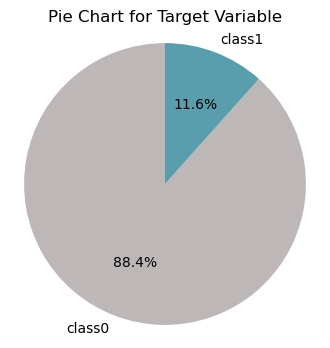

In [5]:
import matplotlib.pyplot as plt
counts = df['Default'].value_counts()
labels = ['class0', 'class1']
sizes = counts.values 
colors = ['#bdb8b7', '#5a9dac'] 
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Pie Chart for Target Variable')
plt.show()

In [6]:
#DELETE 'LoanID'(this ia an unique identifier)------Our data is IID(no group structure)
df = df.drop(columns=['LoanID'])
y = df['Default'] 
X = df.loc[:, df.columns != 'Default']

In [7]:
print(df['EmploymentType'].value_counts())
print(df['MaritalStatus'].value_counts())
print(df['HasMortgage'].value_counts())
print(df['HasDependents'].value_counts())
print(df['LoanPurpose'].value_counts())
print(df['HasCoSigner'].value_counts())

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


In [8]:
edu_correct_order = ["High School", "Bachelor's", "Master's", "PhD"]
print(df['Education'].value_counts().reindex(edu_correct_order))

Education
High School    63903
Bachelor's     64366
Master's       63541
PhD            63537
Name: count, dtype: int64


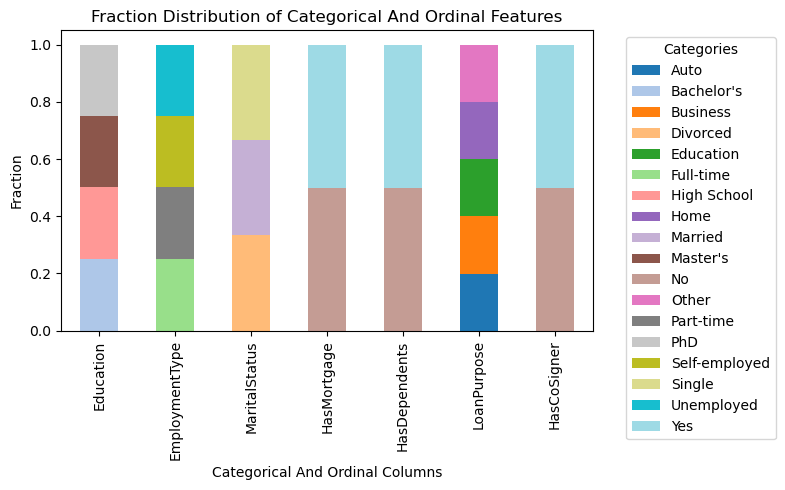

In [9]:
import matplotlib.pyplot as plt
# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Calculate fraction distributions for each categorical column
fraction_dict = {}
for col in categorical_columns:
    col_fractions = df[col].value_counts(normalize=True)
    fraction_dict[col] = col_fractions

# Convert the fraction dictionary to a DataFrame and fill missing values with 0
fraction_df = pd.DataFrame(fraction_dict).fillna(0)

# Step 3: Plot the stacked bar plot
fraction_df.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab20')

# Customizing the plot
plt.title("Fraction Distribution of Categorical And Ordinal Features")
plt.ylabel("Fraction")
plt.xlabel("Categorical And Ordinal Columns")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
print(df['Age'].describe())
print(df['Income'].describe())
print(df['LoanAmount'].describe())
print(df['CreditScore'].describe())
print(df['MonthsEmployed'].describe())
print(df['NumCreditLines'].describe())
print(df['InterestRate'].describe())
print(df['LoanTerm'].describe())
print(df['DTIRatio'].describe())

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64
count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64
count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64
count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64
count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75% 

Text(0.5, 1.0, 'Correlation Matrix of Continuous Features')

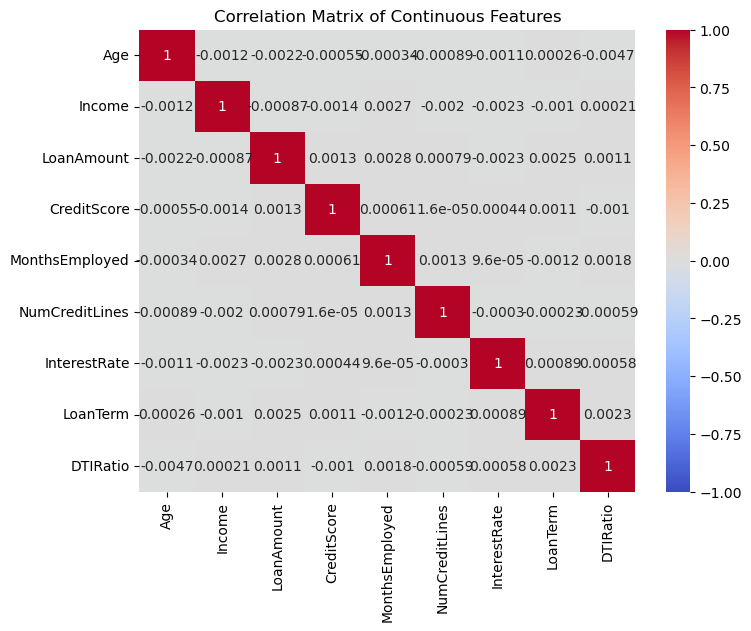

In [13]:
import seaborn as sns
#Correlation
exclude_columns = ['Default', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                   'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Education']
Xcorr = df.loc[:, ~df.columns.isin(exclude_columns)]
corr_matrix = Xcorr.corr(method='pearson', min_periods=1, numeric_only=False)
#print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Continuous Features")

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


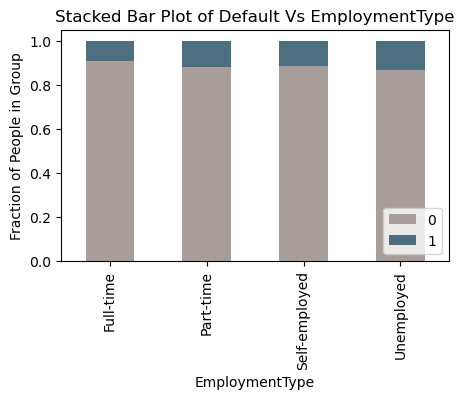

In [14]:
#Categorical vs. categorical columns
print(df['EmploymentType'].value_counts())

import matplotlib.pyplot as plt
#stacked bar plot
colors=['#a79e9c','#4e6e81']
count_matrix = df.groupby(['EmploymentType', 'Default']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3),color=colors)
plt.title("Stacked Bar Plot of Default Vs EmploymentType")
plt.ylabel('Fraction of People in Group')
plt.legend(loc=4)
plt.show()

EmploymentType
Unemployed       8650
Part-time        7677
Self-employed    7302
Full-time        6024
Name: count, dtype: int64


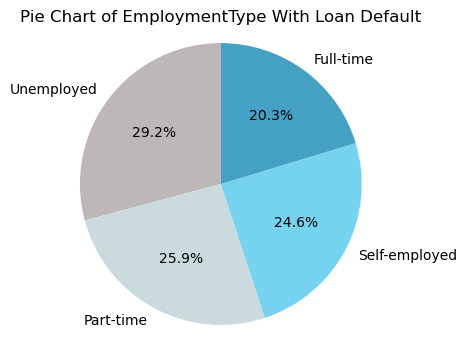

In [15]:
import matplotlib.pyplot as plt
counts = df[df['Default'] == 1]['EmploymentType'].value_counts()
print(counts)
labels = ['Unemployed', 'Part-time','Self-employed','Full-time']
sizes = counts.values 
colors = ['#bdb8b7','#cbdbdd', '#75d3f0','#45a1c3',] 
plt.figure(figsize=(4, 4))
plt.pie(sizes,colors=colors,labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Pie Chart of EmploymentType With Loan Default')
plt.show()

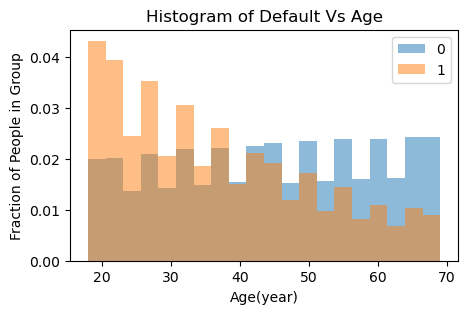

In [16]:
#Continuous vs. categorical columns
#category-specific histograms
categories = df['Default'].unique()
bin_range = (df['Age'].min(),df['Age'].max())
colors=['#a79e9c','#4e6e81']
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Default']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)   
plt.legend()
plt.title('Histogram of Default Vs Age')
plt.ylabel('Fraction of People in Group')
plt.xlabel('Age(year)')
plt.show()
#'Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm','DTIRatio'

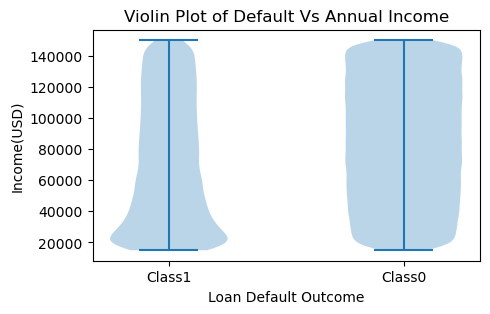

In [17]:
#violin plot
dataset = [df[df['Default']==1]['Income'].values,
           df[df['Default']==0]['Income'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Class1','Class0'])
plt.title('Violin Plot of Default Vs Annual Income')
plt.ylabel('Income(USD)')
plt.xlabel('Loan Default Outcome')
plt.show()

In [18]:
#CHECK Missing Value
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (255347, 17)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [19]:
#Splitting：Stratify Kfold Split
#Stratify: Target is imbalanced
from sklearn.model_selection import train_test_split
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.9,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True)) 

**balance with stratification:**
(array([0, 1]), array([203124,  26688]))
(array([0, 1]), array([11285,  1482]))
(array([0, 1]), array([11285,  1483]))


In [20]:
from sklearn.model_selection import StratifiedKFold
# stratified K Fold: variation in balance is very small (4th decimal point)
random_state = 42
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

test balance: (array([0, 1]), array([45139,  5931]))
new fold
(array([0, 1]), array([135416,  17791]))
(array([0, 1]), array([45139,  5931]))
new fold
(array([0, 1]), array([135416,  17792]))
(array([0, 1]), array([45139,  5930]))
new fold
(array([0, 1]), array([135416,  17792]))
(array([0, 1]), array([45139,  5930]))
new fold
(array([0, 1]), array([135417,  17791]))
(array([0, 1]), array([45138,  5931]))


In [21]:
#What preprocessors did you use and why? 
#How many features and data points do you have before and after preprocessing.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
# collect which encoder to use on each feature
ordinal_ftrs = ['Education'] 
ordinal_cats = [["High School", "Bachelor's", "Master's", "PhD"]]
onehot_ftrs = ['EmploymentType','MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
std_ftrs = ['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm','DTIRatio']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])  

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_val.shape)
print(X_val_prep.shape)
print(X_test.shape)
print(X_test_prep.shape)

(153208, 16)
(153208, 28)
(51069, 16)
(51069, 28)
(51070, 16)
(51070, 28)
